# Vorwort
Die folgenden Programmieraufgaben sind *vor* der Versuchsdurchführung zu lösen. In der Hausaufgabe werden Sie Funktionen definieren und eine Messkette programmieren, die Sie dann in der Versuchsdurchführung und -auswertung nutzen werden.

Es ist empfehlenswert, sich für das AT-Labor ein Python-Environment anzulegen.
Das Elektroakustik-Environment kann weiterbenutzt werden. Es muss nur das Paket `waveform-analysis` nachinstalliert werden:

```
pip install git+https://github.com/endolith/waveform-analysis.git@master
```

Alternativ kann ein neues Environment angelegt werden:

1. [Anaconda](https://anaconda.org) installieren 
2. Terminal (Linux, Mac) oder Anaconda Prompt (Windows) starten
3. Environment erstellen und aktivieren
    ```
    conda create --name atlabor python numpy ipykernel matplotlib pandas
    conda activate atlabor

    ```
4. Zusätzliche Pakete installieren (conda zuerst, danach pip)
    ```
    conda install -c conda-forge ipympl
    pip install sounddevice pyfar git+https://github.com/endolith/waveform-analysis.git@master
    
    ```

`ipykernel` für Jupyter notebooks, `ipympl` für widget plots in notebooks (nicht benötigt aber praktisch), `sounddevice` für audio playback, `scipy` und `pyfar` für Signalanalyse/DSP, `pandas` zum Betrachten von Variablen in VS Code, `waveform-analysis` für A-Bewertung.


Für Aufgabe 3 wird eine aktuelle Version von `pyfar` benötigt. Falls Sie ein vorhandenes Environment benutzen, updaten Sie das Paket mit dem Befehl

        pip install pyfar --upgrade


<div class="admonition important alert alert-block alert-warning">
<p>⚠️ <strong>WICHTIG:</strong></p>
<p>
Die Auswertung der Programmieraufgaben erfolgt halbautomatisiert. Deswegen ist es wichtig, dass die Datei nur in den gekennzeichneten Bereichen verändert wird. Alle Anderen Zellen sollen unberührt bleiben. Bitte keine Zellen löschen oder neue Zellen hinzufügen. Insbesondere die mit <code># Diese Zelle bitte NICHT verändern</code> markierten Zellen dienen der Auswertung und dürfen <strong>nicht</strong> verändert werden. Einige der darin befindlichen Tests sind aus dem Dokument entfernt, andere Testzellen wurden bewusst im Dokument gelassen und können gerne zur Prüfung des eigenen Codes ausgeführt (aber nicht verändert) werden.
</p></div>

* Weisen Sie die Werte Ihrer Lösungen den in den Aufgabenstellungen genannten Variablennamen zu, falls angegeben. 
* Fügen Sie die Lösung von Python-Aufgaben immer in dem Bereich

        # ============= Ihre Lösung hier ===============
        raise NotImplementedError('Diese Zeile Löschen')
        # ==============================================

    ein (Löschen Sie die Zeile, die den `NotImplementedError` erzeugt).
* Fügen Sie Erläuterungen und Diskussionen immer in den folgenden Bereichen ein:

  ---
  _Ihre Lösung hier:_
       
       
  ---

* Ignorieren Sie alle leeren, schreibgeschützten Zellen.
* Zellen mit Tests (s.u.) dienen der Selbstkontrolle. Wenn diese Zellen beim Ausführen einen Fehler auswerfen, wurde die Aufgabe nicht richtig gelöst. Bitte verändern Sie **nicht** den Inhalt der Testzellen.

        ### BEGIN TESTS
        assert( x == y )
        assert isinstance(x, pf.Signal)
        ### END TESTS

In [18]:
import numpy as np
import pyfar as pf
import waveform_analysis as wa
import matplotlib.pyplot as plt
from typing import Union
import ast
import inspect
%config InlineBackend.figure_format='retina'

def contains_for_loop(func):
    # This function checks if a function contains a for loop
    tree = ast.parse(func)
    for node in ast.walk(tree):
        if isinstance(node, ast.For):
            return True
    return False

print(f'pyfar version: {pf.__version__}')

pyfar version: 0.7.3


# 1 Anregesignale, Spektren und Signaleigenschaften 

In dieser Aufgabe sollen drei verschiedene zeitdiskrete Signale generiert werden. Unterschiedliche Spektrendarstellungen und Signalcharakteristika sollen verglichen werden.

## 1.1 Sinussignal (1P)
Erzeugen Sie mit `pyfar` ein Sinussignal `sn` mit der Frequenz $f = 1 \,\mathrm{kHz}$, mit der Abtastfrequenz $f_\mathrm{s} = 48 \,\mathrm{kHz}$, mit einer Länge $N = 96001$ Samples und Amplitude $1$.

Benutzen Sie [pf.signals.sine()](https://pyfar.readthedocs.io/en/latest/modules/pyfar.signals.html#pyfar.signals.sine)

In [19]:
fs = 48000                        # Abtastfrequenz
N = 96001                         # Anzahl Samples

# ============= Ihre Lösung hier ===============
f = 1_000
fs = 48_000
N = 96_001
A = 1
sn = pf.signals.sine(frequency=f, n_samples=N, amplitude=A, sampling_rate=fs)
# ==============================================

In [20]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert 'sn' in locals()
assert isinstance(sn, pf.Signal)
assert sn.n_samples == N
assert sn.sampling_rate == 48000
assert sn.time[0,0] == 0
assert sn.time.shape == (1, N)
assert np.isclose(np.max(sn.time), 1.0)
assert np.isclose(np.min(sn.time), -1.0)
### END TESTS

## 1.2 Weißes Rauschen (1P)
Erzeugen Sie mit `pyfar` ein Signal `wn` mit weißem Rauschen, mit der Abtastfrequenz $f_\mathrm{s} = 48\,\mathrm{kHz}$, mit einem rms-Wert von $0.1$, mit einer Länge $N = 96001$ Samples.

Benutzen Sie [`pf.signals.noise()`](https://pyfar.readthedocs.io/en/latest/modules/pyfar.signals.html#pyfar.signals.noise), zur Rekonstruierbarkeit der Ergebnisse mit `seed=1`

In [21]:
# ============= Ihre Lösung hier ===============
rms = 0.1
wn = pf.signals.noise(n_samples=N, spectrum="white", rms=rms, sampling_rate=fs, seed=1)
# ==============================================

In [22]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert 'wn' in locals()
assert isinstance(wn, pf.Signal)
assert wn.n_samples == N
assert sn.sampling_rate == 48000
assert np.isclose(pf.dsp.rms(wn) , 0.1, atol=1e-13)
assert np.isclose(np.std(wn.time), 0.0999988673923, atol=1e-13), f'Expected 0.0999988673923, but got {np.std(wn.time)}. Did you use the correct seed?'
### END TESTS

## 1.3 Rosa Rauschen (1P)
Erzeugen Sie mit `pyfar` ein Signal `pn` mit rosa Rauschen (pink noise), mit der Abtastfrequenz $f_\mathrm{s} = 48 \,\mathrm{kHz}$, mit einem rms-Wert von $0.1$, mit einer Länge $N = 96001$ Samples.

Benutzen Sie [pf.signals.noise()](https://pyfar.readthedocs.io/en/latest/modules/pyfar.signals.html#pyfar.signals.noise), zur Rekonstruierbarkeit der Ergebnisse mit `seed=1`.

In [23]:
# ============= Ihre Lösung hier ===============
pn = pf.signals.noise(n_samples=N, spectrum="pink", rms=rms, sampling_rate=fs, seed=1)
# ==============================================

In [24]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert 'pn' in locals()
assert isinstance(sn, pf.Signal)
assert pn.n_samples == N, f'Expected {N}, but got {pn.n_samples}'
assert sn.sampling_rate == 48000, f'Expected 48000, but got {sn.sampling_rate}'
assert np.isclose(pf.dsp.rms(pn) , 0.1, atol=1e-3), f'Expected 0.1, but got {pf.dsp.rms(pn)}'
assert np.isclose(np.std(pn.time), 0.09479637869466993, atol=1e-14), f'Expected 0.09479637869466993, but got {np.std(pn.time)}. Did you use the correct seed?'
### END TESTS

## 1.4 Effektivwert (2P)
Schreiben Sie eine Funktion `rms(x)`, die für jeden Kanal $i$ den Effektivwert (rms, root mean square) berechnet. Der rms-Wert des $i$-ten Kanals ist definiert als:

$$ \mathrm{rms}(x_i) = \sqrt{\mathrm{mean}(x_i^2)} = \sqrt{\frac{1}{N} \sum_{k=0}^{N-1} x_i[k]^2}$$
$x_{i}[k]$ ist das $k$-te Sample des $i$-ten Kanals. $N$ steht für die Gesamtzahl der Samples.

**Hinweis:** Benutzen Sie die Funktionen `np.sqrt()` und `np.mean(..., axis=...)` (oder `np.sum()`). Benutzen Sie **keine** for-Schleifen zur kanalweisen Berechnung, sondern nutzen Sie den `axis`-Parameter bei der Mittelwertberechnung. Benutzen Sie **nicht** die Funktion `pf.dsp.rms()`.

**Tipp:** In `pf.Signal.time` Arrays wird die Zeitachse immer in der *letzten* Dimension des Arrays gespeichert. Mit `axis=-1` wählen Sie die letzte Array-Dimension aus. 

In [25]:
def rms(x: Union[pf.Signal, np.array]) -> np.array: # Hier sehen Sie Type Hints für die Eingabe und Ausgabe. Es wird entweder ein pyfar Signal oder ein Numpy Array erwartet, zurückgegeben wird ein Numpy Array.
    if isinstance(x, pf.Signal):
        x = x.time # pf.Signal in Numpy Array umwandeln

    # Aus dem Numpy Array den Effektivwert x_rms kanalweise berechnen:
    # ============= Ihre Lösung hier ===============
    x_rms = np.sqrt(np.mean(x**2, axis=-1))
    # ==============================================

    if x_rms.shape == (1,):
        return x_rms.item() # Falls nur ein Wert berechnet wird, Skalarwert x_rms statt array([x_rms]) zurückgeben
    return x_rms # rms werte zurückgeben

In [26]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
# Hinweis: Mehrkanälige Pyfar Signale können z.B. erzeugt werden, indem Arrays als Inputvariablen benutzt werden:
amplitudes = np.arange(6).reshape(2,-1)

x_test = pf.signals.sine(frequency=1, amplitude=amplitudes, n_samples=fs, sampling_rate=fs)
assert np.allclose(rms(x_test), pf.dsp.rms(x_test)), f'Expected\n{pf.dsp.rms(x_test)}, but got\n{rms(x_test)}'
assert np.allclose(rms(x_test.time), pf.dsp.rms(x_test)), f'Expected\n{pf.dsp.rms(x_test)}, but got\n{rms(x_test.time)}'
assert rms(x_test).shape == amplitudes.shape, f'Expected{pf.dsp.rms(x_test).shape} but got {rms(x_test).shape}'
assert not contains_for_loop(inspect.getsource(rms)), 'The function rms contains a for loop, which is not allowed.'
del x_test
### END TESTS

## 1.5 Maximalwert (2P)
Schreiben Sie eine Funktion `peak()`, die `pf.Signal` Objekte annimmt und für jeden Kanal $i$ den maximalen Absolutwert des Signals berechnet:

$$ \mathrm{peak}(x_i) = \max{(|x_i|)}$$

**Hinweis:** Achten Sie darauf, den Maximalwert jedes Kanals separat zu berechnen, und nicht den insgesamt auftretenden Maximalwert. Benutzen Sie **keine** for-Schleifen zur kanalweisen Berechnung, sondern z.B. den `axis`-Parameter in `np.max()`.

In [27]:
def peak(x: Union[pf.Signal, np.array]) -> np.array:
    if isinstance(x, pf.Signal):
        x = x.time # Signal in Numpy Array umwandeln

    # Aus dem Numpy Array den maximalen Absolutwert x_peak für jeden Kanal berechnen:
    # ============= Ihre Lösung hier ===============
    x_peak = np.max(np.abs(x), axis=-1)
    # ==============================================


    if x_peak.shape == (1,):
        return x_peak.item() # Falls nur ein Wert berechnet wird, Skalarwert statt array zurückgeben
    return x_peak # rms werte zurückgeben

In [28]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
# assert np.isclose(peak(sn), 1), f'Expected 1, but got {peak(sn)}'
amplitudes = np.arange(6.0).reshape(2, -1)
x_test = pf.signals.sine(frequency=1, amplitude=np.arange(6).reshape(2, -1), n_samples=fs, sampling_rate=fs)
assert np.allclose(peak(x_test), np.array([[0., 1., 2.],
                                           [3., 4., 5.]])), f'Expected\n{amplitudes}, but got\n{peak(x_test)}'
assert peak(x_test).shape == x_test.cshape, f'Expected{pf.dsp.peak(x_test).shape} but got {peak(x_test).shape}'
assert not contains_for_loop(inspect.getsource(peak)), "The function 'peak' contains a for loop, which is not allowed."
### END TESTS


## 1.6 A-Bewertung (2P)

Schreiben Sie eine Funktion `A_weighting()`, die `pf.Signal` Objekte annimmt und die A-Bewertung auf jeden Kanal anwendet.
Lesen Sie die Zeitdaten aus dem Signal aus und wenden Sie das A-Bewertungsfilter mithilfe der Funktion `wa.A_weight(signal=..., fs=...)` auf das Signal an.
Benutzen Sie **keine** for-Schleifen zur kanalweisen Berechnung.

**Hinweis:** Genau wie Ihre Funktion `rms()` erwartet die Funktion `wa.A-weight`, dass die letzte Array-Dimension der Zeitdaten die Zeitachse enthält.

In [29]:
def A_weighting(x: pf.Signal) -> pf.Signal:
    # Zeitdaten auslesen und als Numpy Array speichern:
    # ============= Ihre Lösung hier ===============
    x = x.time
    # ==============================================

    # A-Gewichtungsfilter auf Zeitdaten anwenden:
    # ============= Ihre Lösung hier ===============
    x_A = wa.A_weight(signal=x, fs=fs)
    # ==============================================

    # A-gewichtete Signale in pyfar Signal 'result' umwandeln:
    # ============= Ihre Lösung hier ===============
    x_weighted = pf.Signal(x_A, sampling_rate=fs)
    # ==============================================

    return x_weighted # A-gewichtetes Signal zurückgeben


In [30]:
### BEGIN TESTS
assert np.isclose(rms(A_weighting(sn)), 0.707409, atol=1e-6), f"Expected 0.707409, got {rms(A_weighting(sn))}"
assert np.isclose(rms(A_weighting(wn)), 0.065721, atol=1e-6), f"Expected 0.065721, got {rms(A_weighting(wn))}"
assert np.isclose(rms(A_weighting(pn)), 0.055864, atol=1e-6), f"Expected 0.055864, got {rms(A_weighting(pn))}"

x_test = pf.signals.sine(frequency=[10, 100, 1000, 10000], amplitude=1, n_samples=fs, sampling_rate=fs)
assert np.allclose(rms(A_weighting(x_test)), [4.37923083e-04, 7.80315344e-02, 0.707360237, 4.61635329e-01], atol=1e-9), f"Expected [4.37923083e-04, 7.80315344e-02, 0.707360237, 4.61635329e-01], got {rms(A_weighting(x_test))}"
assert not contains_for_loop(inspect.getsource(A_weighting)), "The function 'A_weighting' contains a for loop, which is not allowed."
### END TESTS

## 1.7 Pegel in dBFS (1P)
Schreiben Sie eine Funktion `dBFS()`, die numpy-Arrays und Skalare als Funktionswerte annimmt und komponentenweise deren Pegel in dBFS berechnet:

$$ L_\mathrm{x} = 20 \cdot \log_{10} (|x|) \, \mathrm{dBFS}$$

In [31]:
def dBFS(x: Union[np.array, float]) -> Union[np.array, float]:
    # Pegel L_x in dBFS berechnen:
    # ============= Ihre Lösung hier ===============
    L_x = 20 * np.log10(np.abs(x))
    # ==============================================

    return L_x

In [32]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert(dBFS(1) == 0), f'Expected 0, but got {dBFS(1)}'
assert(np.allclose(dBFS(np.array([1, -0.1, 0.01])),
                        np.array([0,  -20,  -40]))), f'Expected [0, -20, -40], but got {dBFS(np.array([1, -0.1, 0.01]))}'
### END TESTS

## 1.8 Spektrum (2P)
Stellen Sie die auf **Amplituden** normierten Betragsspektren aller Signale mittels `pf.plot.freq()` dar.
Achten Sie auf korrekte Achsenbeschriftungen und fügen Sie eine Legende ein.
(1P)

**Hinweis:** Um die Betragsspektren auf Amplituden zu normieren, setzen Sie das `fftnorm`-Attribut der Signale.
Alle Einstellmöglichkeiten der Normalisierung sind [hier](https://pyfar.readthedocs.io/en/latest/modules/pyfar.dsp.fft.html#pyfar.dsp.fft.normalization) aufgelistet und erklärt.
Dort finden Sie auch die korrekte Option für Amplitudennormierung.

In [33]:
# ============= Ihre Lösung hier ===============
# Normalisierung
sn = pf.dsp.fft.normalization(_, n_samples=N, sampling_rate=fs, fft_norm='amplitude')
wn = pf.dsp.fft.normalization(_, n_samples=N, sampling_rate=fs, fft_norm='amplitude')
pn = pf.dsp.fft.normalization(_, n_samples=N, sampling_rate=fs, fft_norm='amplitude')
'''
spec (numpy array) – N dimensional array which has the frequency bins in the last dimension. 
E.g., spec.shape == (10,2,129) holds 10 times 2 spectra with 129 frequency bins each.
'''

# Plot
fig, ax = plt.subplots()
pf.plot.freq(sn, ax=ax)
pf.plot.freq(wn, ax=ax)
pf.plot.freq(pn, ax=ax)
ax.set_xlabel('Frequenz in Hz')
ax.set_ylabel('Amplitude in dBFS')
ax.legend(['Sinussignal', 'Weißes Rauchen', 'Rosa Rauschen'])
plt.tight_layout()
plt.show()
# ==============================================

ValueError: Input 'spec' must be a numpy array.

In [ ]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
assert(sn.fft_norm != 'rms')
assert(wn.fft_norm != 'rms')
assert(pn.fft_norm != 'rms')
### END TESTS

AssertionError: 

### Verständnisfragen (1P):

1. Warum entsteht beim Sinussignal kein unendlich schmaler Peak?
2. Beschreiben Sie den Unterschied der beiden Rauschspektren.

---
_Ihre Lösung hier:_


---

## 1.9 Fensterung (3P)
Fenstern Sie das Sinussignal mit drei verschiedenen Fenstern auf **exakt** 1 Sekunde Länge, also auf $N = 48000$ Samples. Nutzen Sie dafür die Funktion `pf.dsp.time_window()`. Kürzen Sie das Signal mit dem Funktionsparameter `crop` auf die Länge des Fensters. (1P)

1. Benutzen Sie ein Dreieck-Fenster und nennen Sie die Variable `sn_tri`

2. Benutzen Sie ein Hann-Fenster und nennen Sie die Variable `sn_han`

3. Benutzen Sie ein Rechteck-Fenster (boxcar) und nennen Sie die Variable `sn_box`

Verifizieren Sie, dass die Signale die richtige Länge haben. Plotten Sie die Spektren des ungefensterten Signals und aller drei gefensterten Signale in einem gemeinsamen Plot, normiert auf Sinusamplituden. Skalieren Sie die $y$-Achse auf den Bereich (-300, 10) dBFS. Fügen Sie eine Legende ein. (1P)

**Tipp:** Mit `pf.plot.freq(..., alpha=0.8)` können Sie die Plots transparent machen. So stellen Sie sicher, dass immer alle Linien sichtbar sind.


Singallänge (Dreieck): 48000
Signallänge (Hanning): 48000
Signallänge (Rechteck): 48000


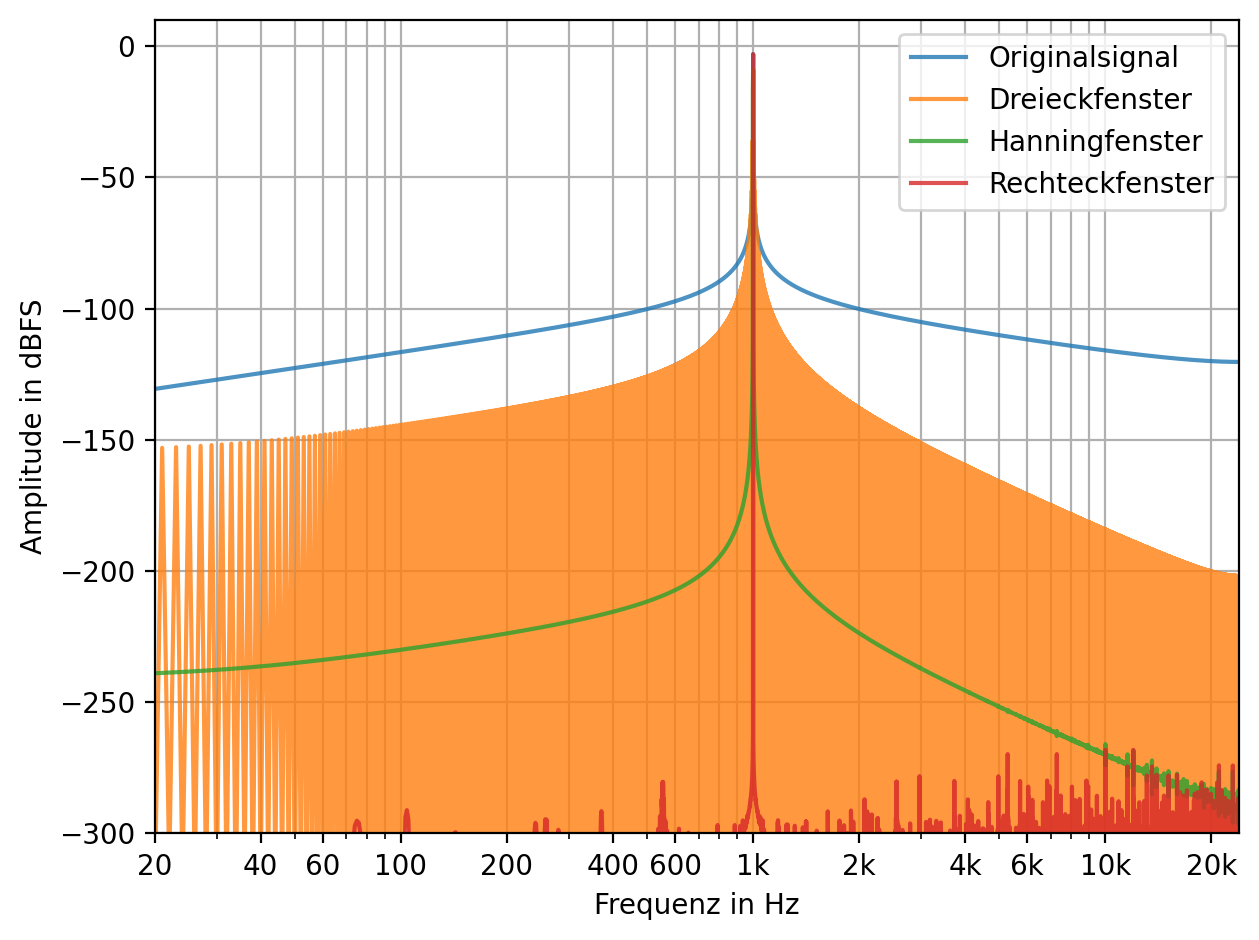

In [35]:
# Fensterung:
# ============= Ihre Lösung hier ===============
N_1 = 48_000 - 1
sn_tri = pf.dsp.time_window(sn, interval=[0, N_1], window='triang', crop='window')
sn_han = pf.dsp.time_window(sn, interval=[0, N_1], window='hann', crop='window')
sn_box = pf.dsp.time_window(sn, interval=[0, N_1], window='boxcar', crop='window')

# Normalisierung nach Fensterung


# ==============================================

# Plot:
# ============= Ihre Lösung hier ===============
print(f'Singallänge (Dreieck): {sn_tri.n_samples}')
print(f'Signallänge (Hanning): {sn_han.n_samples}')
print(f'Signallänge (Rechteck): {sn_box.n_samples}')

fig, ax1 = plt.subplots()
pf.plot.freq(sn, ax=ax1, alpha=0.8)
pf.plot.freq(sn_tri, ax=ax1, alpha=0.8)
pf.plot.freq(sn_han, ax=ax1, alpha=0.8)
pf.plot.freq(sn_box, ax=ax1, alpha=0.8)

ax1.set_xlabel('Frequenz in Hz')
ax1.set_ylabel('Amplitude in dBFS')
ax1.set_ylim(-300, 10)
ax1.legend(['Originalsignal', 'Dreieckfenster', 'Hanningfenster', 'Rechteckfenster'])
plt.tight_layout()
plt.show()
# ==============================================

In [36]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
for name in ['sn_box', 'sn_tri', 'sn_han']:
    assert name in locals()
for i in [sn_box, sn_tri, sn_han]:
    assert(i.fft_norm == 'amplitude')
    assert(i.n_samples == fs )
### END TESTS

AssertionError: 

#### Verständnisfragen (1P)

1. Beschreiben Sie die qualitativen Unterschiede zwischen den Spektren. 

2. Welches Fenster eignet sich in diesem Fall am besten?

3. Grundfrequenz und Amplitude des untersuchten Signals sind bekannt und konstant. Welches Fenster würde sich am besten eignen, wenn das Signal nicht bekannt wäre?

---
_Ihre Lösung hier:_


---

## 1.10 Gain-Korrektur der Fensterung (3P)
Neben den in der letzten Aufgabe beobachteten qualitativen Effekten reduziert die Fensterung allgemein auch die Energie (rms-Werte) der Signale sowie die Amplituden im Betragsspektrum.

Soll die Energie oder Amplitude eines gefensterten Signals berechnet werden, muss dieser Effekt kompensiert werden.

Bestimmen Sie den Amplituden- und den Energie-Korrekturfaktor (Amplitude Correction Factor `ACF`, Energy Correction Factor `ECF`) des Hann-Fensters, um den durch die Fensterung verursachten Verlust in Amplitude bzw. Energie auszugleichen.

1. Betrachten Sie das Sinus-Signal `sn`.

2. Fenstern Sie das Signal erneut mit einem Hann-Fenster. Fenstern Sie das gesamte Signal, d.h. verwenden Sie das erste und letzte Sample des Signals als Fenstergrenzen. Geben Sie mit `return_window=True` auch das Fenster zurück.

3. Berechnen Sie den Amplituden-Korrekturfaktor des Hann-Fensters (Kehrwert des arithmetischen Mittels der Zeitdaten des Fensters) und speichern Sie ihn in der Variable `ACF_hann`.

4. Berechnen Sie den Energie-Korrekturfaktor des Hann-Fensters (Kehrwert des rms-Wertes der Zeitdaten des Fensters) und speichern Sie ihn in der Variable `ECF_hann`.

5. Berechnen Sie die rms-Werte des ungefensterten und des um den Energie-Korrekturfaktor korrigierten gefensterten Signals (jeweils in dBFS) und speichern Sie diese in den Variablen `sn_dBFS_rms` und `sn_hann_dBFS_rms`. Stellen Sie sicher, dass beide Werte übereinstimmen.

6. Stellen Sie die Zeitdaten und Spektren des ungefensterten sowie des um den Amplituden-Korrekturfaktor korrigierten gefensterten Signals in gemeinsamen Plots dar. Stellen Sie sicher, dass die Amplituden der Spektren beider Signale bei 1000 Hz exakt übereinstimmen.

Amplituden-Korrekturfaktor: 2.000
Energie-Korrekturfaktor: 1.633
rms-Werte:
Ungefenstertes Signal: -3.01 dBFS
Gefenstertes Signal: -3.01 dBFS



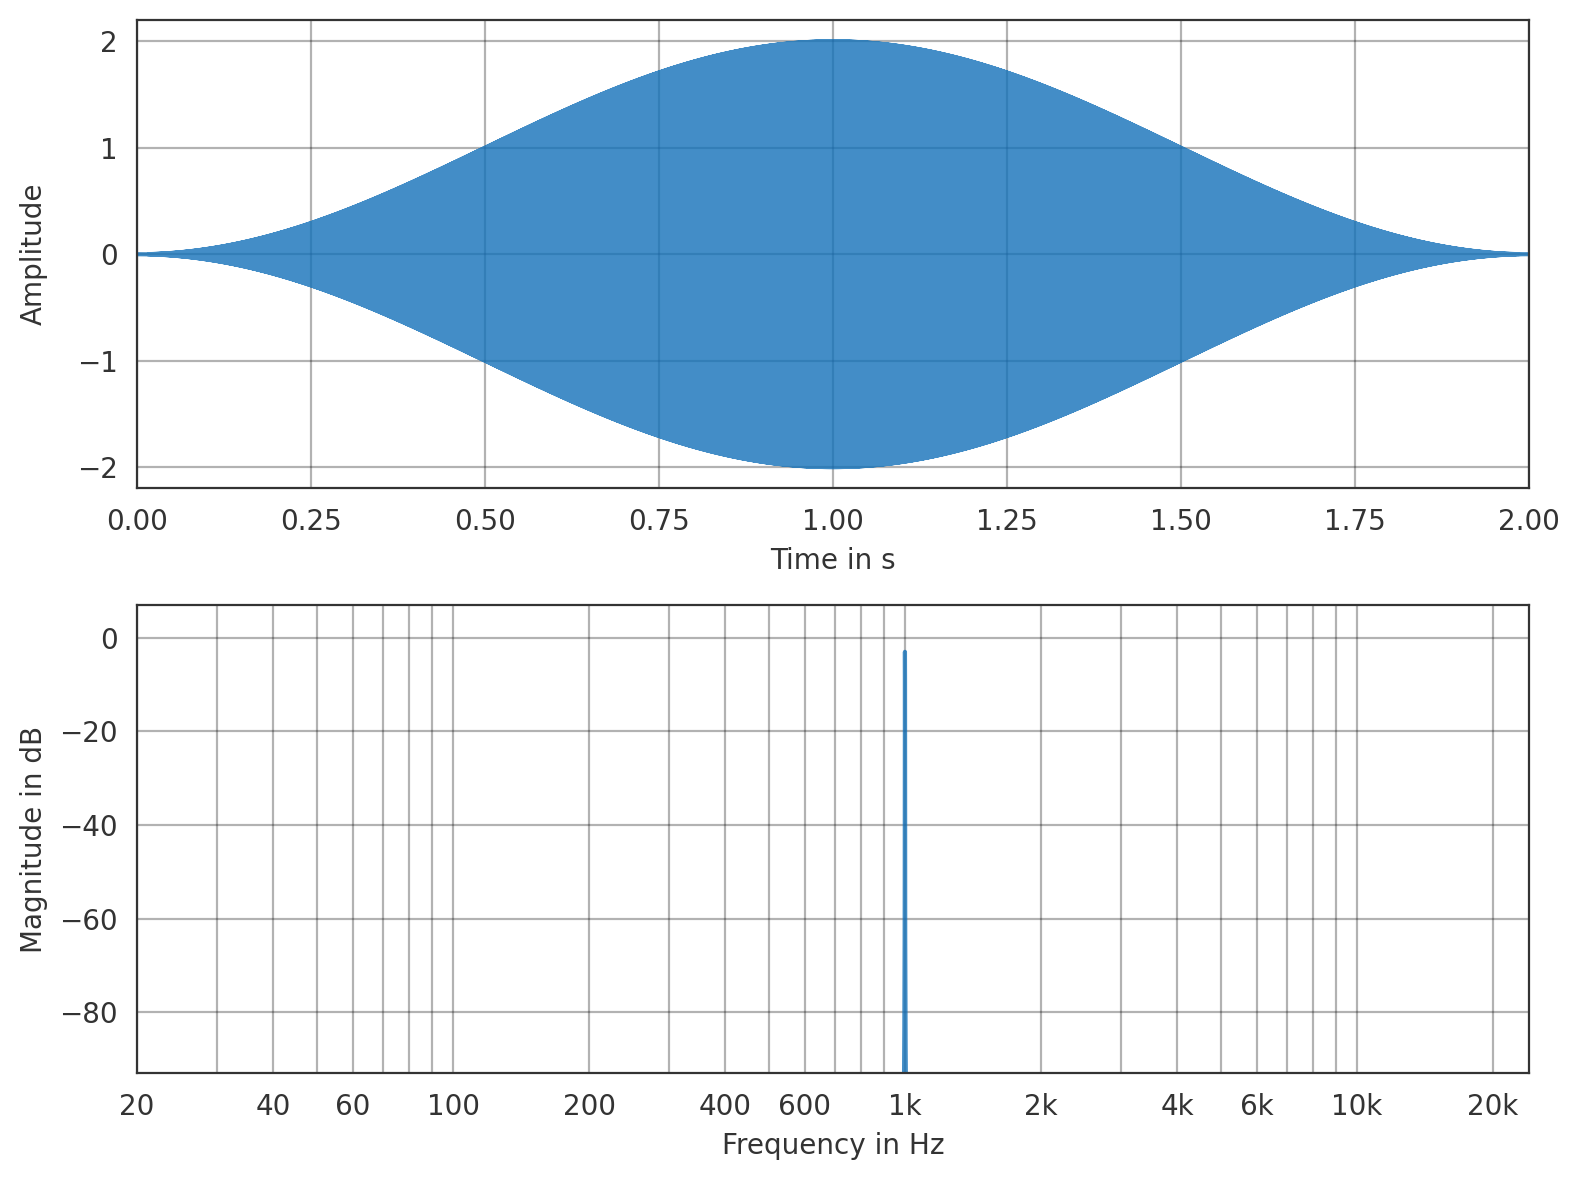

In [41]:
# Fensterkorrekturfaktoren berechnen:
# ============= Ihre Lösung hier ===============
sn_hann, hann_window = pf.dsp.time_window(
    sn, 
    interval=[0, sn.n_samples - 1], 
    window='hann', 
    crop='window',
    return_window=True)

ACF_hann = 1 / np.mean(hann_window.time)
ECF_hann = 1 / rms(hann_window)
# ==============================================

print(f'Amplituden-Korrekturfaktor: {ACF_hann:.3f}\nEnergie-Korrekturfaktor: {ECF_hann:.3f}')

# rms-Pegel vergleichen:
# ============= Ihre Lösung hier ===============
sn_dBFS_rms = dBFS(rms(sn))
sn_hann_dBFS_rms = dBFS(rms(sn_han) * ECF_hann)
# ==============================================

print(f'rms-Werte:\nUngefenstertes Signal: {sn_dBFS_rms:.2f} dBFS\nGefenstertes Signal: {sn_hann_dBFS_rms:.2f} dBFS\n')

# FFT-Amplituden vergleichen:
# ============= Ihre Lösung hier ===============
sn_hann_corrected = sn_hann * ACF_hann

# Normalisierung

# Plot
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
pf.plot.time_freq(sn, ax=ax2, alpha=0.8)
pf.plot.time_freq(sn_hann_corrected, ax=ax3, alpha=0.8)
ax2.set_xlabel('Zeitbereich in s')
ax2.set_ylabel('Amplitude')
ax2.legend(['Ungefenstertes Signal', 'Gefenstertes Signal (Hanning)'])
ax2.set_ylim(-300, 10)
plt.tight_layout()
plt.show()
# ==============================================

In [ ]:
# Diese Zelle bitte NICHT verändern
### BEGIN TESTS
for name in ['ACF_hann', 'ECF_hann', 'sn_dBFS_rms', 'sn_hann_dBFS_rms']:
    assert(name in locals())
assert(np.isclose(sn_dBFS_rms, -3.01, atol=0.0005)), f'Expected -3.01, but got {sn_dBFS_rms}'
assert(np.isclose(sn_hann_dBFS_rms, -3.01, atol=0.0005)), f'Expected -3.01, but got {sn_hann_dBFS_rms}'
### END TESTS